# Titanic: Machine Learning from Disaster
## Predict survival on the Titanic

1. Defining the problem statement

2. Import Libraries

3. Collecting the data

4. Exploratory data analysis (EDA)

5. Data Visualization

6. Data Cleaning

7. Model Building

8. Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.

In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3. Collecting the data
Training data set and Testing data set are given by Kaggle you can download from https://www.kaggle.com/c/titanic/data

In [2]:
# Load dataset using pandas library

data=pd.read_csv("titanic_train.csv")

## 4. Exploratory data analysis

In [3]:
data.head() # Print first 5 rows of dataset

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
data.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

## Data Dictionary
1. Survived: 0 = No, 1 = Yes
2. pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3. sibsp: # of siblings / spouses aboard the Titanic
4. parch: # of parents / children aboard the Titanic
5. ticket: Ticket number
6. cabin: Cabin number
7. embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
data.shape

(850, 15)

### Total rows and columns

We can see that there are 850 rows and 15 columns in our training dataset.

In [6]:
data.dtypes # check data types

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object

In [7]:
data.nunique()  # check unique values 

passenger_id    850
pclass            3
name            849
sex               2
age              88
sibsp             7
parch             8
ticket          660
fare            236
cabin           135
embarked          3
boat             26
body             73
home.dest       272
survived          2
dtype: int64

In [42]:
data.describe()    # Statistics Summary

,pclass,sex,age,sibsp,parch,fare,embarked,survived
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.32000,0.648235,29.519847,0.522353,0.382353,34.012701,0.207059,0.368235
std,0.83853,0.477802,12.984533,1.112132,0.879511,53.674141,0.405437,0.482610
min,1.00000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.00000,1.000000,29.519847,0.000000,0.000000,14.108300,0.000000,0.000000
75%,3.00000,1.000000,34.875000,1.000000,0.000000,31.000000,0.000000,1.000000
max,3.00000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000


In [9]:
# check null values
data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

There are null values present in age, fare, cabin, embarked, boat, body, home.dest. 

<AxesSubplot:>

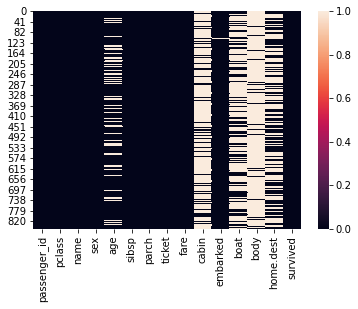

In [10]:
a=data.isnull()
sns.heatmap(a)

Heatmap shows null values of dataset

## 5. Data visualization

### Countplot for Categorical features

<AxesSubplot:xlabel='survived', ylabel='count'>

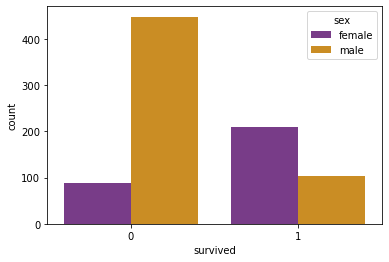

In [11]:
sns.countplot(x="survived", hue="sex", data=data, palette='CMRmap')

The countplot confirms Women more likely survivied than Men

<AxesSubplot:xlabel='sibsp', ylabel='count'>

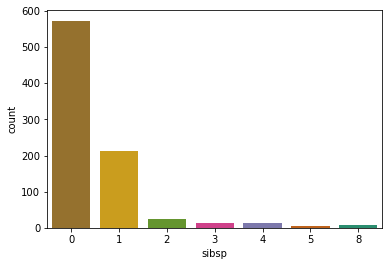

In [12]:
sns.countplot(data['sibsp'], palette = 'Dark2_r')

<AxesSubplot:xlabel='parch', ylabel='count'>

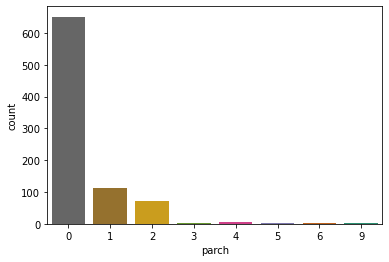

In [13]:
sns.countplot(data['parch'], palette= 'Dark2_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

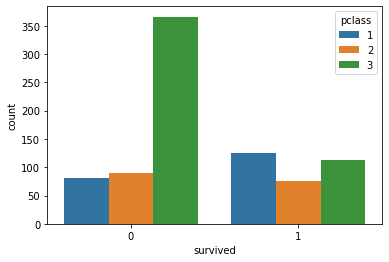

In [14]:
sns.countplot(x="survived", hue="pclass", data=data)

The countplot shows **1st class** more likely **survivied** than other classes
and **3rd class** more likely **dead** than other classes.

In [15]:
# pclass valaues count
data.pclass.value_counts() 

3    478
1    206
2    166
Name: pclass, dtype: int64

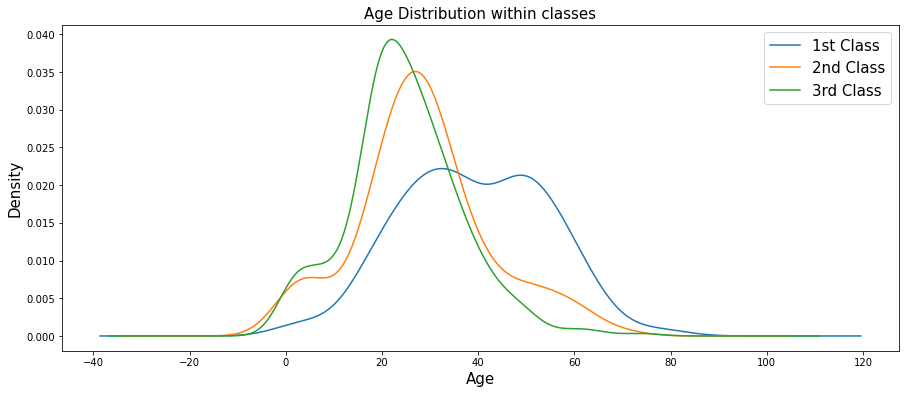

In [16]:
fig = plt.figure(figsize=(15,6))
# plots a kernel density estimate of the subset of the 1st class passangers's age
data.age[data.pclass == 1].plot(kind='kde')    
data.age[data.pclass == 2].plot(kind='kde')
data.age[data.pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age", fontsize = 15)  
plt.ylabel("Density", fontsize = 15)
plt.title("Age Distribution within classes", fontsize = 15)

plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best', fontsize = 15)  # sets our legend for our graph.

<AxesSubplot:xlabel='age', ylabel='Density'>

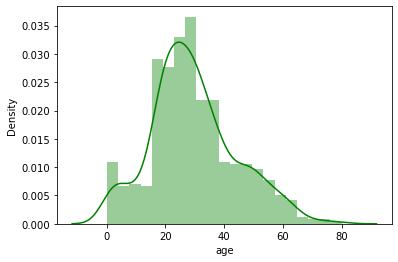

In [17]:
sns.distplot(data['age'], kde=True, color="g")

Above graphs shows 20-40 age passengers are more

## 6. Data Cleaning

In [18]:
data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

**Fill null values**

In [19]:
# find mean of age and replace mean with null values of age
data.age.mean()

29.519847189349115

In [20]:
data['age']= data['age'].fillna(data.age.mean())

In [21]:
data['embarked']= data['embarked'].fillna(data.age.mode()[0])

In [22]:
# find mean of fare and replace mean with null values of fare

data.fare.mean()

34.012700942284994

In [23]:
data['fare']= data['fare'].fillna(data.fare.mean())

In [24]:
# check data
data.head(20)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,29.519847,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.000000,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.000000,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.000000,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.000000,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.000000,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.000000,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.000000,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0


In [25]:
data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin           659
embarked          0
boat            542
body            777
home.dest       386
survived          0
dtype: int64

**Drop Columns which is not reqired for creating model**

In [26]:
data.drop(['name', 'passenger_id', 'cabin', 'boat', 'body', 'home.dest', 'ticket' ], axis=1, inplace= True)

<AxesSubplot:>

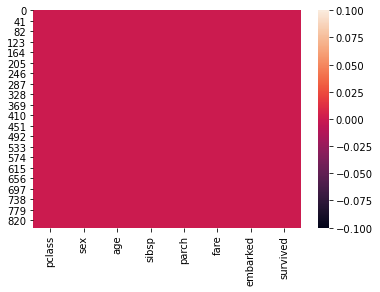

In [27]:
sns.heatmap(data.isnull())

**Heatmap** shows there are no null values present in dataset

In [28]:
data

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,female,29.519847,0,0,7.7333,Q,1
1,3,male,38.000000,0,0,8.6625,S,0
2,3,female,30.000000,1,1,24.1500,S,0
3,2,female,54.000000,1,3,23.0000,S,1
4,2,male,40.000000,0,0,13.0000,S,0
...,...,...,...,...,...,...,...,...
845,1,male,55.000000,0,0,50.0000,S,0
846,1,male,58.000000,0,0,29.7000,C,0
847,2,female,24.000000,1,0,26.0000,S,1
848,3,female,3.000000,1,1,13.7750,S,0


Data shows there are strings present in dataset but we want only numerical values for creating the model. 

We have to replace strings of "sex" and "embarked" columns with dummies 

In [29]:
data["sex"] = pd.get_dummies(data['sex'], drop_first= True)
data["embarked"] = pd.get_dummies(data['embarked'], drop_first= True)

In [30]:
data.head(20)

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,0,29.519847,0,0,7.7333,0,1
1,3,1,38.000000,0,0,8.6625,0,0
2,3,0,30.000000,1,1,24.1500,0,0
3,2,0,54.000000,1,3,23.0000,0,1
4,2,1,40.000000,0,0,13.0000,0,0
5,3,1,28.000000,0,0,22.5250,0,0
6,3,1,19.000000,0,0,0.0000,0,0
7,2,0,30.000000,0,0,13.0000,0,1
8,3,0,22.000000,0,0,7.7750,0,1
9,3,0,21.000000,1,0,9.8250,0,0


In [31]:
data.dtypes

pclass        int64
sex           uint8
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      uint8
survived      int64
dtype: object

## 7. Model Building

### Splitting the data by train test split

In [90]:
x= data.drop('survived', axis = 1)
y= data['survived']

Training data 70% & Testing data 30% 

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 1000)

### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train, y_train)


from sklearn.metrics import accuracy_score, confusion_matrix
lr_predict = lr.predict(x_test)
lr_score = accuracy_score(y_test, lr_predict)

lr_conf = confusion_matrix(y_test, lr_predict)
print("Confusion Matrix: " )

print(lr_conf )
print("Accuracy Score: ", lr_score*100)

Confusion Matrix: 
[[136  27]
 [ 25  67]]
Accuracy Score:  79.6078431372549


### Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)


dtc_predict = dtc.predict(x_test)
dtc_score = accuracy_score(y_test, dtc_predict)

dtc_conf = confusion_matrix(y_test, dtc_predict)
print("Confusion Matrix: " )
print(dtc_conf)
print("Accuracy Score: ", dtc_score*100)

Confusion Matrix: 
[[128  35]
 [ 23  69]]
Accuracy Score:  77.25490196078432


### SVM- Support Vector Classification

In [95]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)


svc_predict = svc.predict(x_test)
svc_score = accuracy_score(y_test, svc_predict)

svc_conf = confusion_matrix(y_test, svc_predict)
print("Confusion Matrix: " )
print(svc_conf)
print("Accuracy Score: ", svc_score*100)

Confusion Matrix: 
[[153  10]
 [ 71  21]]
Accuracy Score:  68.23529411764706


### Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

rf_predict = rf.predict(x_test)
rf_score = accuracy_score(y_test, rf_predict)

rf_conf = confusion_matrix(y_test, rf_predict)
print("Confusion Matrix: " )

print(rf_conf )
print("Accuracy Score: ", rf_score*100)

Confusion Matrix: 
[[138  25]
 [ 18  74]]
Accuracy Score:  83.13725490196079


### Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

nb_predict = nb.predict(x_test)

nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print("Confusion Matrix: " )
print(nb_conf_matrix)
print("Accuracy Score: ", nb_acc_score*100)

Confusion Matrix: 
[[128  35]
 [ 21  71]]
Accuracy Score:  78.03921568627452


## Results:

The accuracy of Logistic Regression is: 79.60 %

The accuracy of Decision Tree Classifier is: 77.25 %

The accuracy of SVM is: 68.23 %

The accuracy of Random Forest Classifier is: 83.13 %

The accuracy of Naive Bayes is: 78.03 %

From above model shows accuracy of Random Forest Classifier is higher than other models. Accuracy of Random Forest Classifier is **83.13%**. 

## 8. Testing Model

In [99]:
a= np.array(y_test)
predicted = np.array(rf.predict(x_test))
df_com=pd.DataFrame({"Original":a, "Predicted": predicted}, index= range(len(a)))
df_com.head(50)

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,0
9,1,1


# Model Created Succsessfully